## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2023, Prof. J.C. Kao, TAs: T.M, P.L, R.G, K.K, N.V, S.R, S.P, M.E

In [71]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

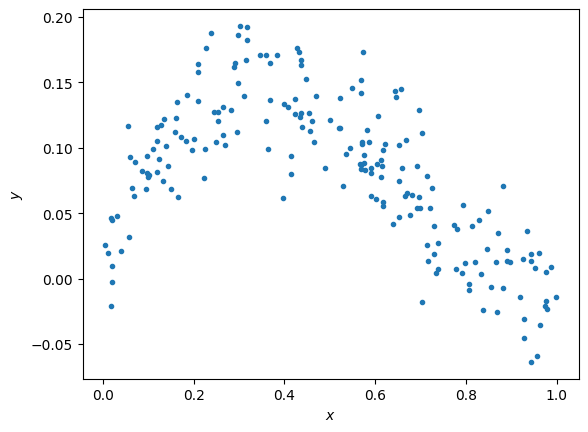

In [72]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) Uniform probability distribution. 

(2) Normal (Gaussian) distribution. 

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [73]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.zeros(2) # please modify this line

theta = ((np.linalg.inv((xhat).dot(xhat.T)).dot(xhat.dot(y)))).T
# print((xhat.dot(y)))
# print(xhat.shape, y.shape)
print(theta)

# use the transpose of what we got in class because in class x was horizontally stacked, but here we are vertical stacking xhat (see vhat)
# try to match dims

# ================== #
# END YOUR CODE HERE #
# ================== #


[-0.10599633  0.13315817]


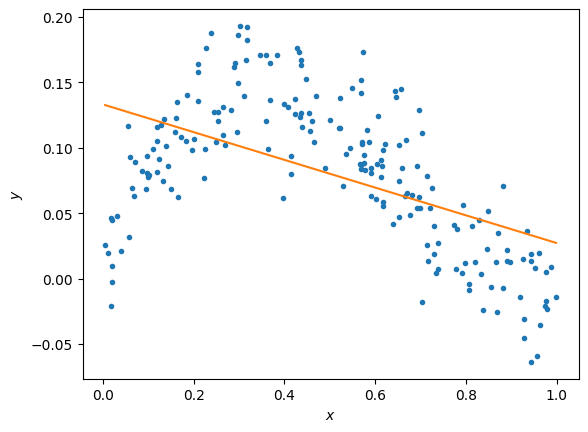

In [74]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) Underfit.

(2) Change the order of the polynomial, as a higher order polynomial model will better fit the data due to its curvature.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [75]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

# hint: add to the vstack

# vstack xhats with x^3, will add to the back
# vstack(x^n, xhat)

# 2 then 3 then 4 then 5 using a loop

xhats.append(xhat)
temp = np.zeros(2)
temp = ((np.linalg.inv((xhat).dot(xhat.T)).dot(xhat.dot(y)))).T
thetas.append(temp)

for i in range(1, N):
    xhat = np.vstack((x**(i+1), xhat))
    xhats.append(xhat)
    thetas.append(((np.linalg.inv((xhat).dot(xhat.T)).dot(xhat.dot(y)))).T)
        
    print(i, thetas[i])
    # print("xhat shape", xhats.shape)
    print("theta shape", thetas[i].shape)

pass

# 0 : x, 1
# 1: x^2, x, 1
# 2: x^3, x^2, x, 1
# 3: x^4, x^3, x^2, x, 1
# 4: x^5, x^4, x^3, x^2, x, 1

# ================== #
# END YOUR CODE HERE #
# ================== #

1 [-0.48023061  0.36743967  0.05521084]
theta shape (3,)
2 [ 0.8843808  -1.82077417  0.91178032  0.00979068]
theta shape (4,)
3 [ 0.14080037  0.60466289 -1.64250929  0.87250485  0.01175321]
theta shape (5,)
4 [ 0.52432592 -1.164568    1.76052438 -2.07430275  0.93373916  0.009716  ]
theta shape (6,)


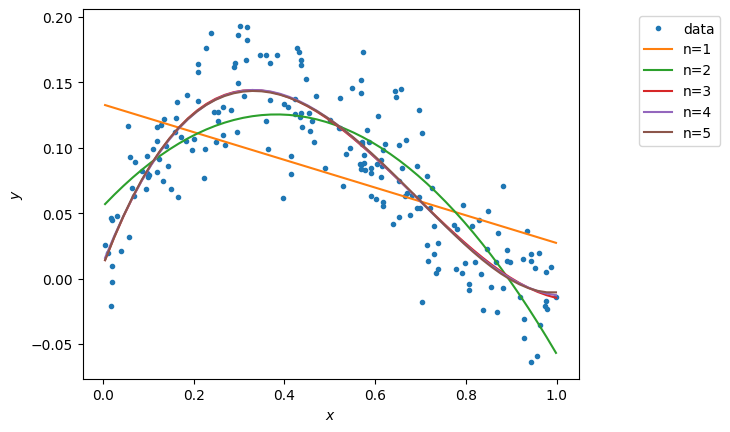

In [76]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [77]:

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
training_errors = [0] * 5
# MSE

for i in range(5):
    training_errors[i] = 0.5*(y.T.dot(y) - 2*(y.T).dot(xhats[i].T).dot(thetas[i]) + thetas[i].T.dot(xhats[i].dot(xhats[i].T)).dot(thetas[i]))


# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.23799610883626965, 0.10924922209268251, 0.08169603801102243, 0.08165353735294645, 0.08161479195520172]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) Polynomial with degree 5.

(2) As the polynomial order increases, the model can better fit the data, eventually passing through each point to make the training data equal to zero. However, this may lead to overfitting.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

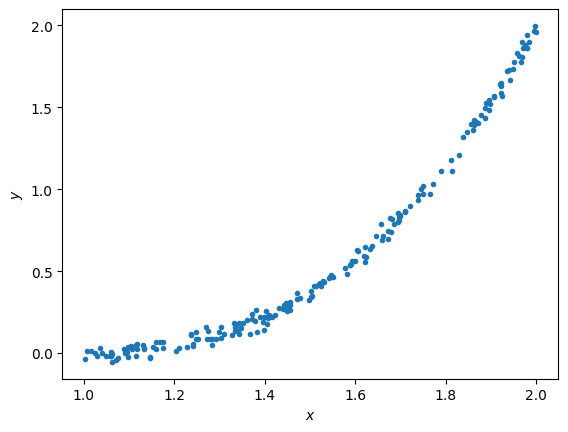

In [78]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [79]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

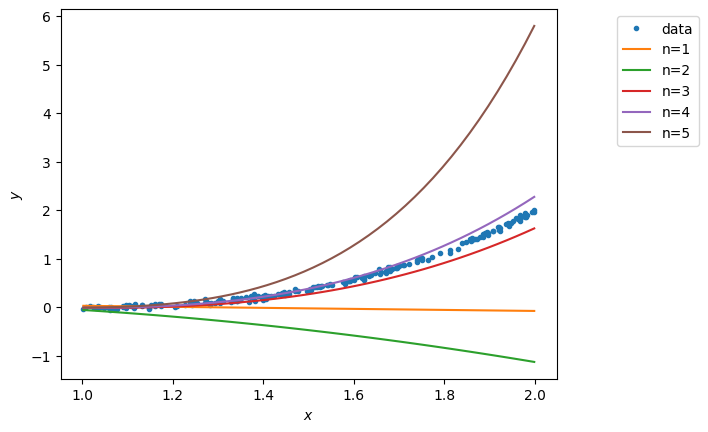

In [80]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [81]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.

testing_errors = [0] * 5
# MSE

for i in range(5):
    testing_errors[i] = 0.5*(y.T.dot(y) - 2*(y.T).dot(xhats[i].T).dot(thetas[i]) + thetas[i].T.dot(xhats[i].dot(xhats[i].T)).dot(thetas[i]))

pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [80.86165184550593, 213.19192445058508, 3.125697108313929, 1.1870765195554753, 214.91021831758638]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) Polynomial of degree 4.

(2) Order 5 polynomial models do not generalize well because such a high order polynomial is prone to overfitting. 